<a href="https://colab.research.google.com/github/jefferson-spec/Intro-to-Data-Science-in-Python/blob/master/Medical_Cost_Data(regress%C3%A3o_linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muitos fatores que afetam o quanto você paga pelo seguro saúde não estão sob seu controle. No entanto, é bom ter uma compreensão do que eles são. Aqui estão alguns fatores que afetam quanto custam os prêmios de seguro saúde

idade: idade do beneficiário principal

sexo: sexo do contratante do seguro, feminino, masculino

bmi: Índice de massa corporal, fornecendo uma compreensão do corpo, pesos que são relativamente altos ou baixos em relação à altura, índice objetivo de peso corporal (kg / m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9

filhos: Número de filhos cobertos pelo seguro saúde / Número de dependentes

fumante: fumar

região: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste

## **Importação dos dados**

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Relatório Estaticista


Idade = A idade media de cliente e 39 anos e a minima de 18 anos chegando até 64 anos.


Custo do benefício = Pessoa com idade (39 anos) tem uma “media” de custo de 13 mil, com massa corporal de 30% e com uma criança, é uma pessoa com maior idade (64 anos) tem um custo maior chegando a 64 mil, com uma massa corporal de 53% e com cinco crianças.

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Temos 0 valores ausentes, o que é muito bom. Agora vamos fazer EDA com alguns gráficos interessantes :) Primeiro, veremos como as cargas são distribuídas de acordo com determinados fatores

EDA Básica

In [ ]:
! pip install sweetviz

In [7]:
import sweetviz

In [8]:
eda = sweetviz.analyze([df,"Seguro Saúde"], target_feat='charges')
eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



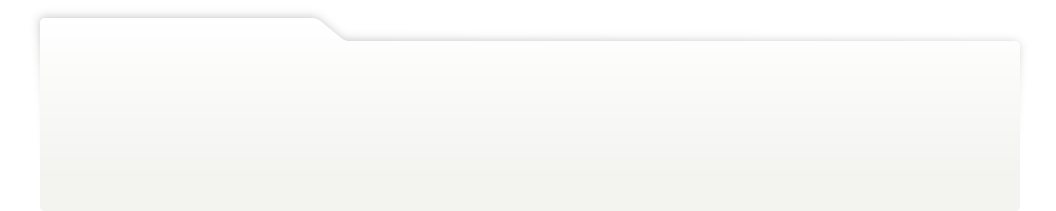
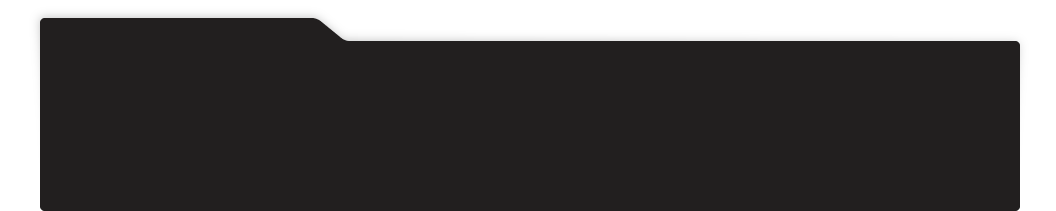
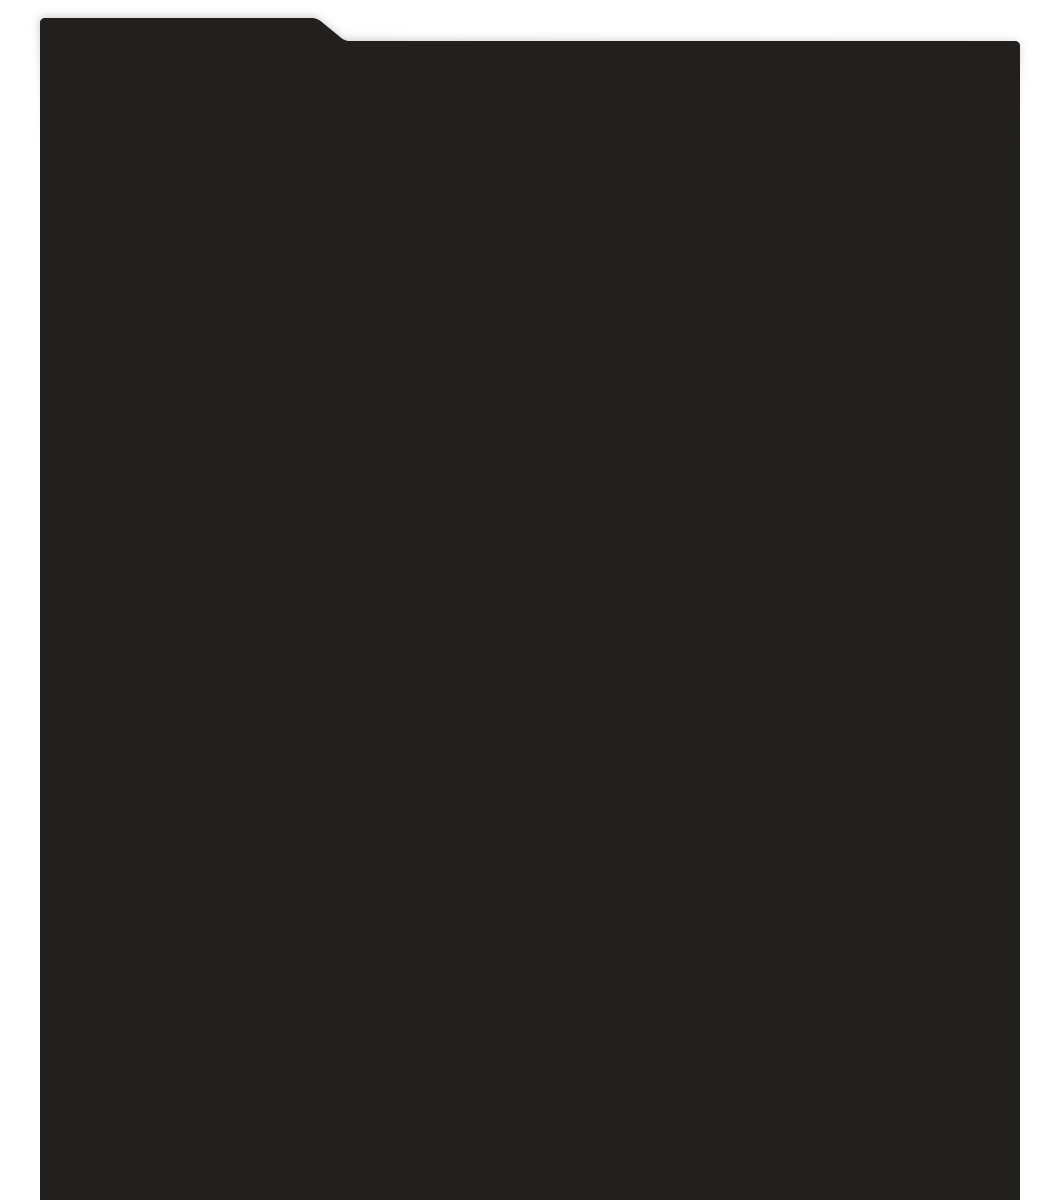
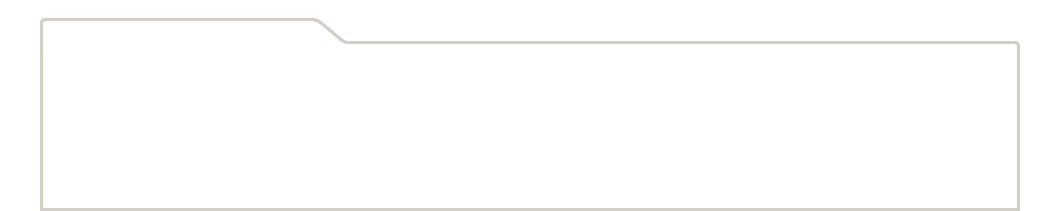
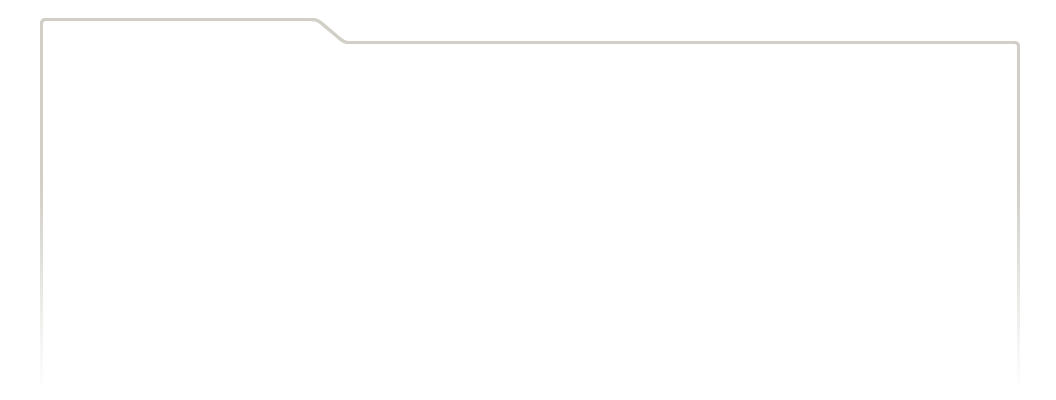
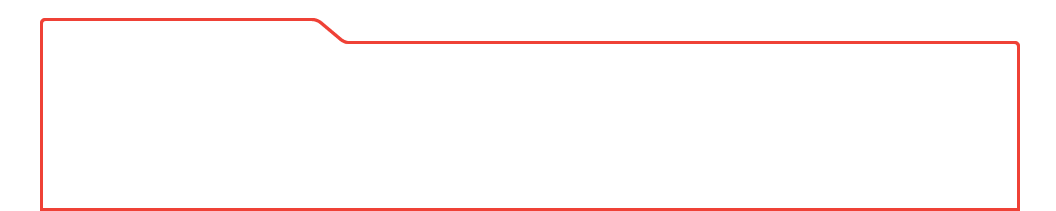
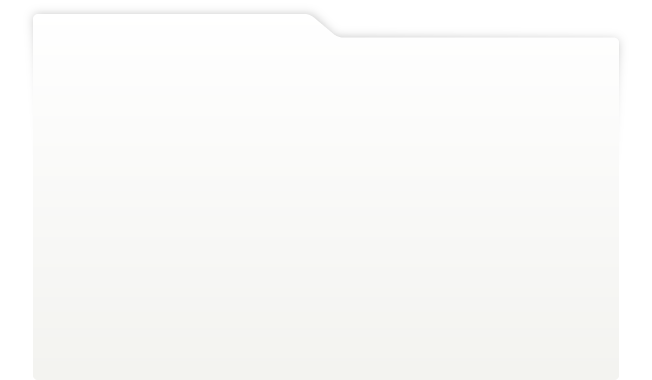
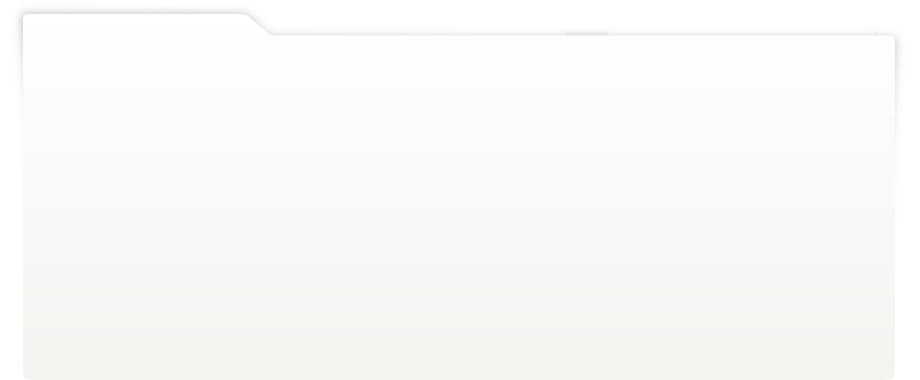
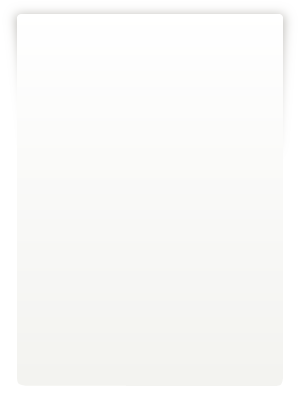
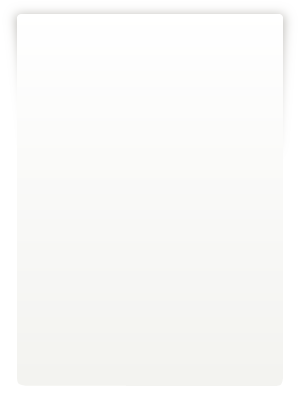
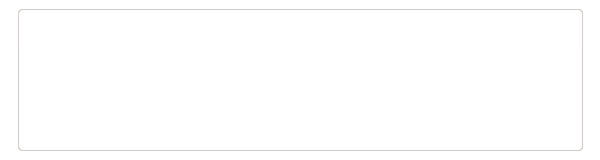
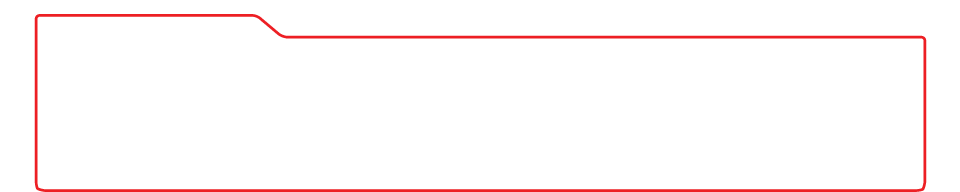
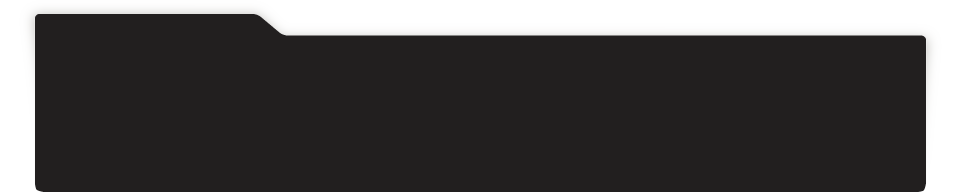
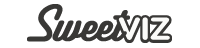
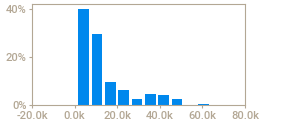
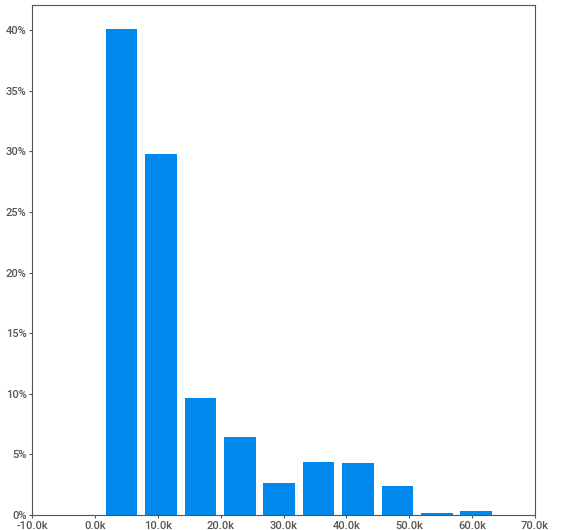
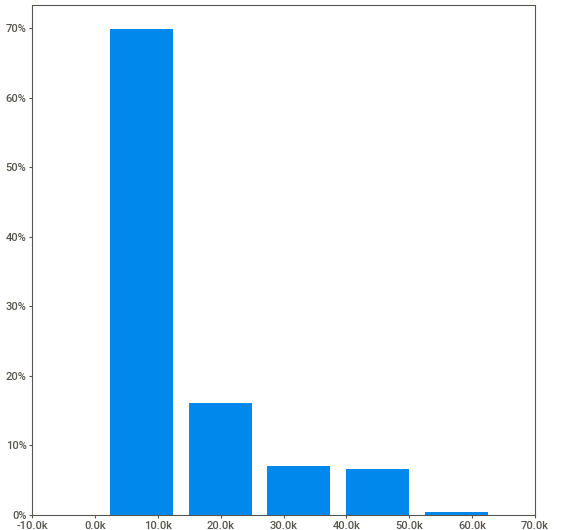
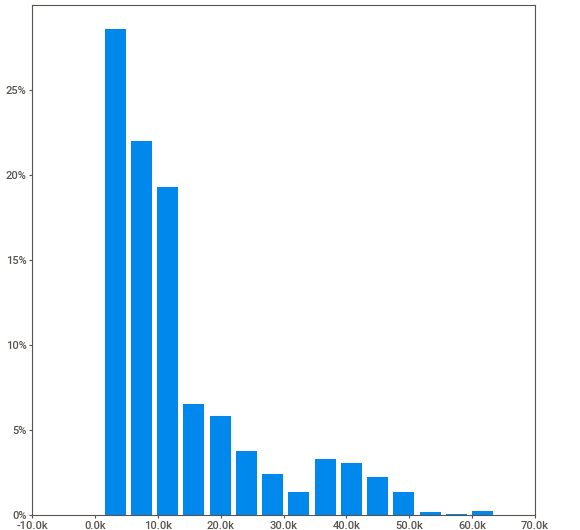
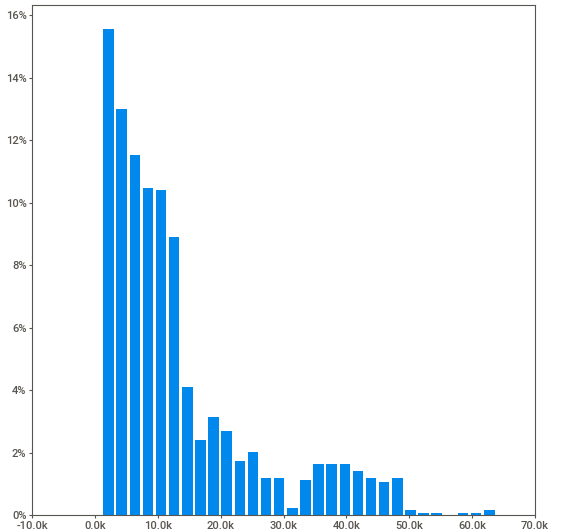
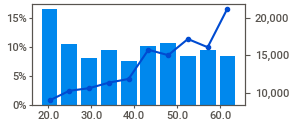
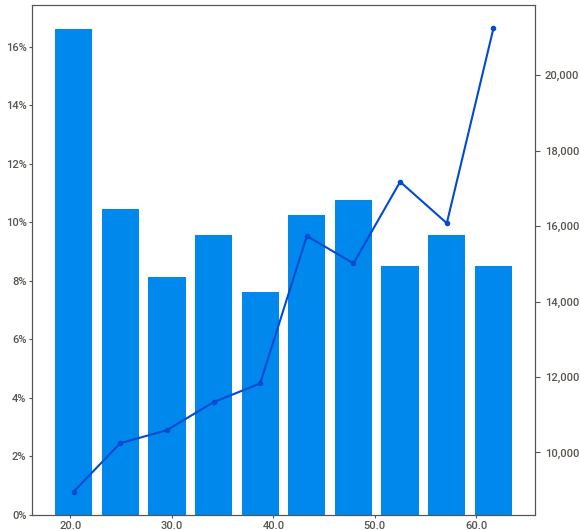
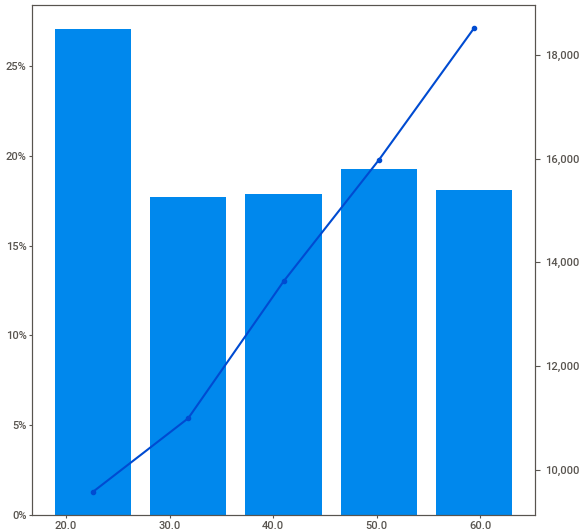
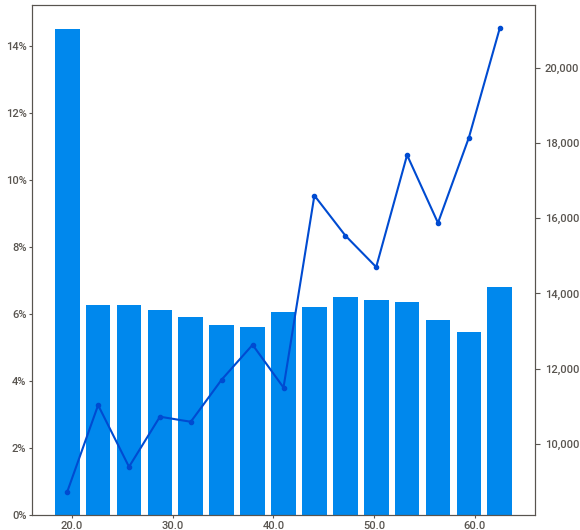
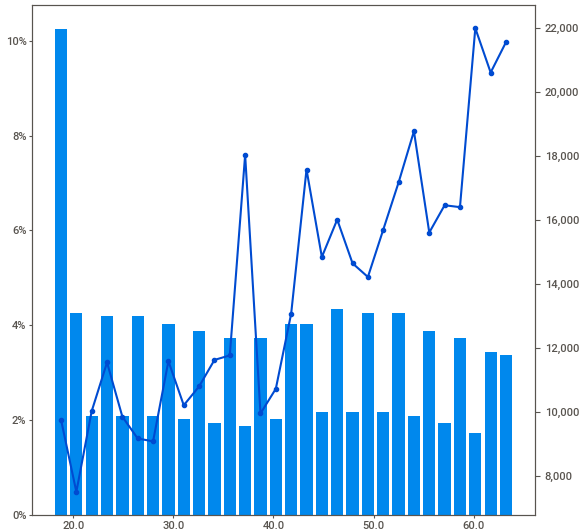
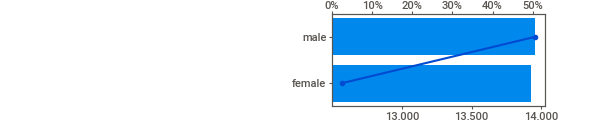
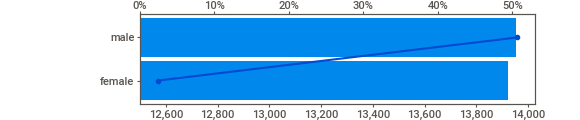
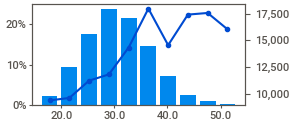
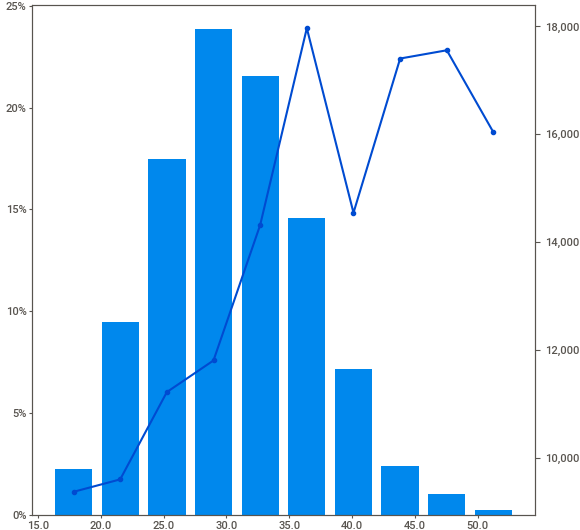
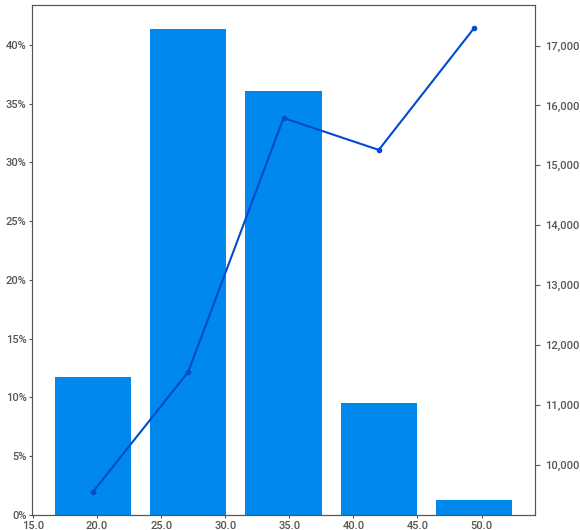
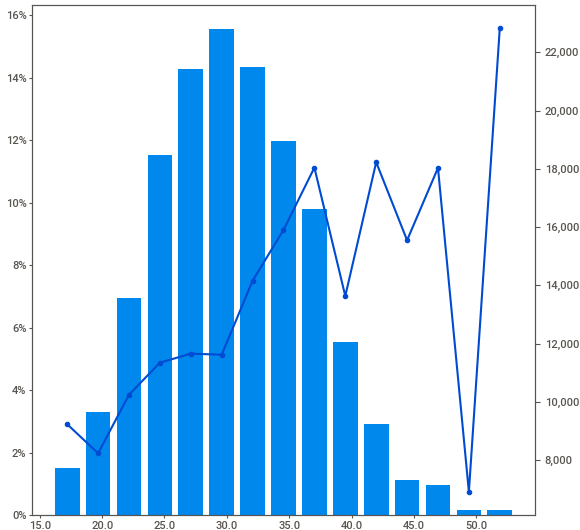
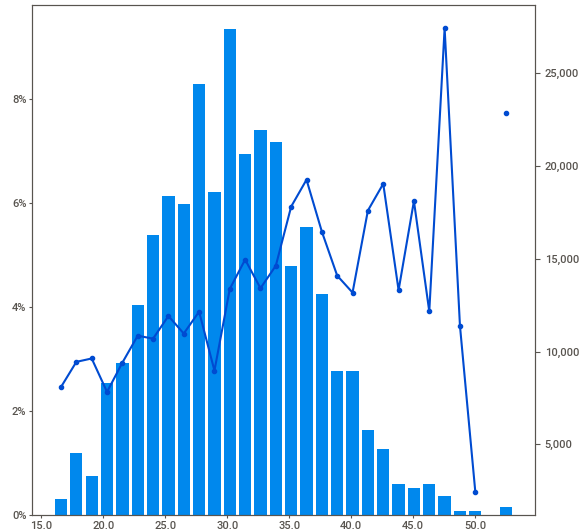
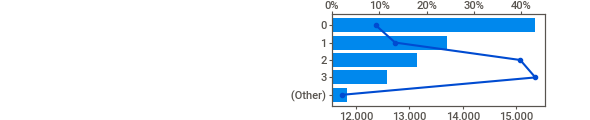
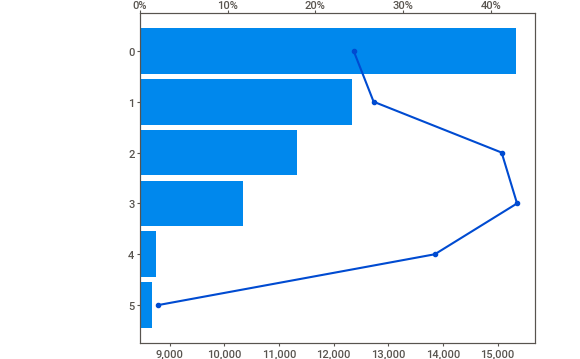
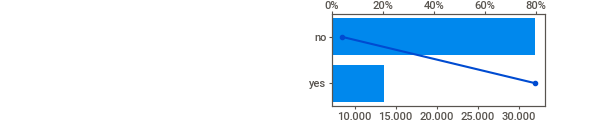
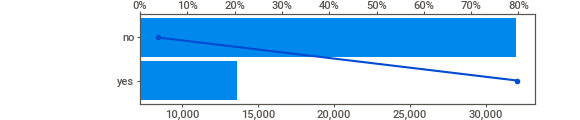
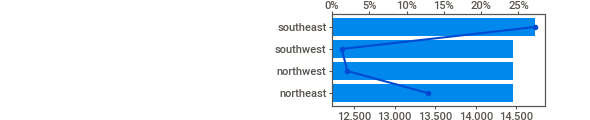
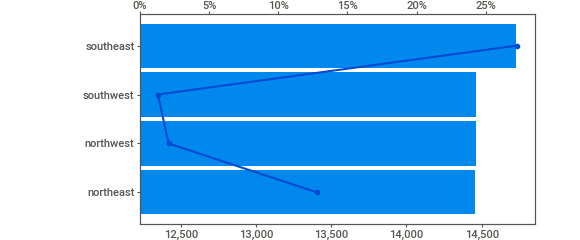
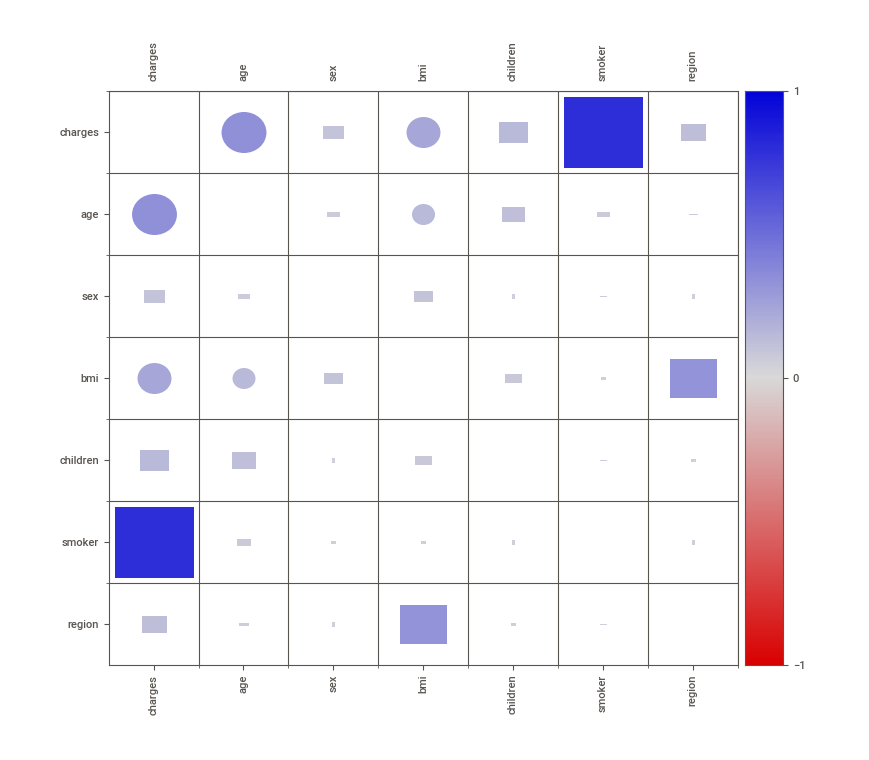
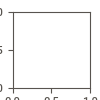

In [9]:
from IPython.display import display ,HTML

display(HTML('/content/SWEETVIZ_REPORT.html'))

## Alguns pré-processamento interessantes antes de prosseguir :

* Transformar a variável smoker em 0 (não) ou 1 (sim)

* Colocar a variável resposta na escala para cada mil dolares

In [ ]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['charges'] = df['charges'] / 1000

### Variáveis que vamos considerar na análise,nesse primeiro momento: charges, 

---

bmi, smoker.

In [ ]:
df1 = df[['bmi','smoker','charges']]
df1.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


##Gráficos pertinentes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

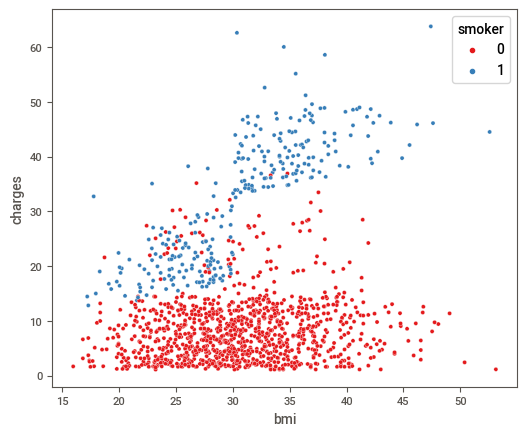

In [ ]:
sns.scatterplot(x ='bmi', y= 'charges',hue='smoker', data=df,palette='Set1');
plt.gcf().set_size_inches(6, 5)

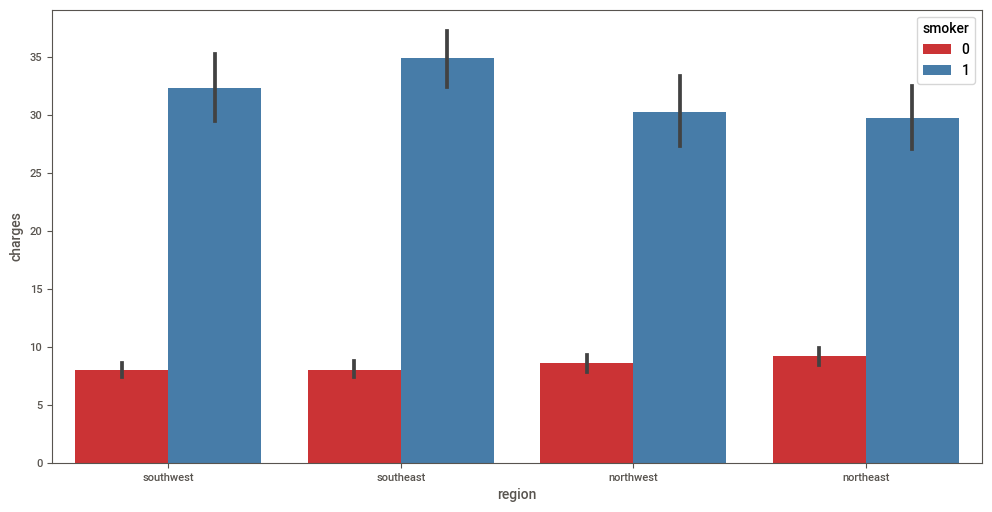

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.barplot(x = 'region', y = 'charges',
                  hue='smoker',data=df, palette='Set1')

Portanto, no geral, as tarifas médicas mais altas estão no Sudeste e as mais baixas no Sudoeste. Levando em consideração alguns fatores (sexo, fumo, ter filhos) vamos ver como muda por região

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


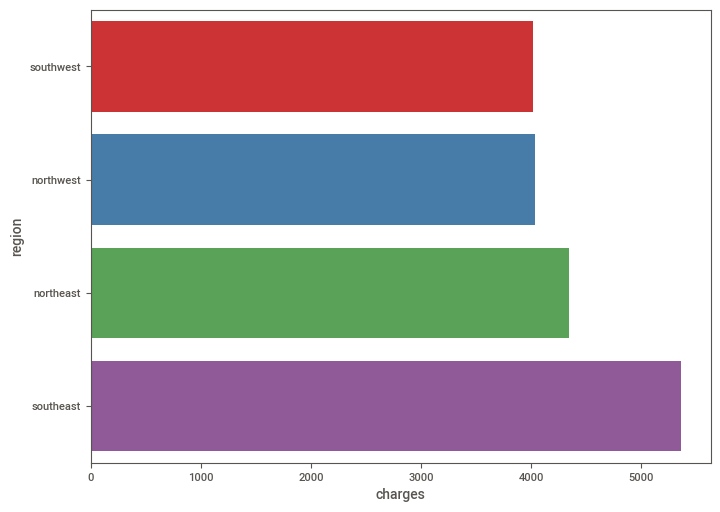

In [ ]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Set1')

Como podemos ver nesses barplots, as maiores tarifas devido ao fumo ainda está no Sudeste, mas as menores estão no Nordeste. As pessoas no sudoeste geralmente fumam mais do que as pessoas no Nordeste, mas as pessoas no Nordeste cobram taxas mais altas por gênero do que no sudoeste e no noroeste em geral. 

### Agora vamos analisar os custos médicos por idade, bmi e filhos de acordo com o fator tabagismo

---



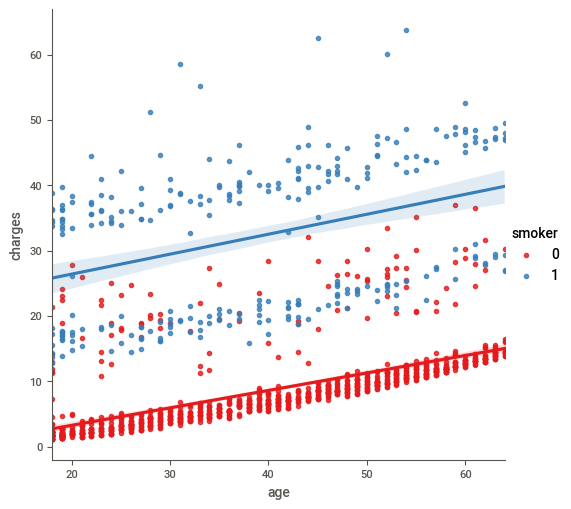

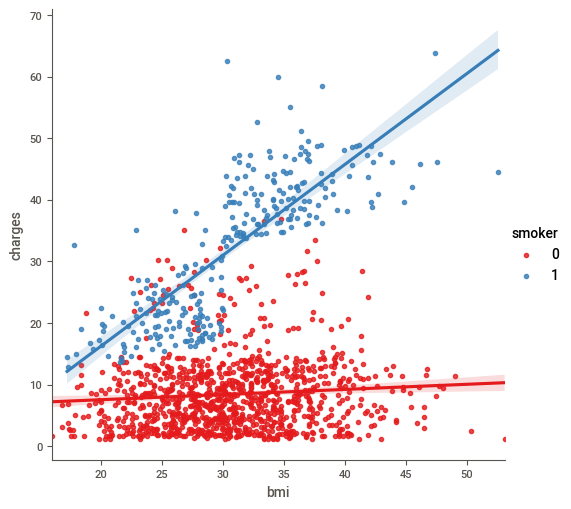

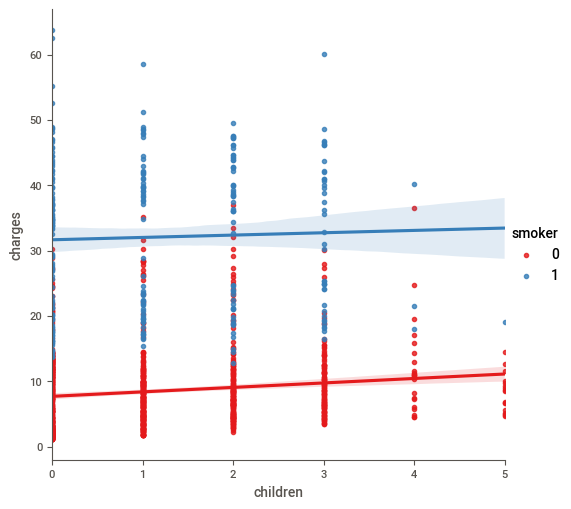

In [ ]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set1')
sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set1')


## Cenário 1 : considerando apenas a variável bmi

> Indented block






In [ ]:
X = df1['bmi'].values.reshape(-1,1)
y = df1['charges']

###*Preparação para a validação do tipo Holdout*

> Indented block



In [ ]:
#Holdout
#Separando em dados teste e treinamento
from sklearn.model_selection import train_test_split
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y ,test_size = 0.25, random_state=1)

In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


In [ ]:

#Ajuste do modelo de regressão linear
from sklearn.linear_model import  LinearRegression
reg = LinearRegression()
reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predição utilizando a amostra teste
preditos = reg.predict(Xteste)

In [ ]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}' .format(round(eqm, 2)))

EQM : 128.73


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1 = reg.coef_
print('Intercepto: \n', b0)
print('Coenfientes:  \n', b1)

Intercepto: 
 1.4867803114088929
Coenfientes:  
 [0.38811688]


Nesse cenário , o modelo de regressão linear é dado por

**CUSTOS = b0 + b1 * IMC**

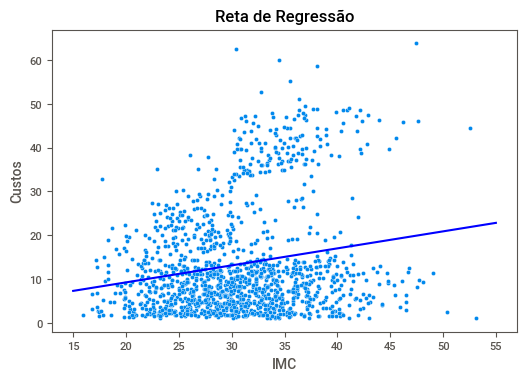

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y= 'charges', data=df);
plt.plot(x, y0, color='blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Note agora o que aconteceria se ajustássemos e avaliássemos o modelo no mesmo conjunto de dados(nesse caso, os dados todos).

> Indented block



In [ ]:
from sklearn.linear_model import  LinearRegression
reg0 = LinearRegression()
reg0.fit(X, y)
preditos = reg0.predict(X)

eqm = mean_squared_error(y,preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 140.78


Cenário 2 : considerando a variável **bmi ** e **smoker**

In [ ]:
X = df[['bmi', 'smoker']]
y = df['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25)

reg = LinearRegression()
reg.fit(Xtreino,ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 53.94


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercept: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercept: 
 -4.759354638036106
Coeficientes: 
 [ 0.43157759 23.1158407 ]


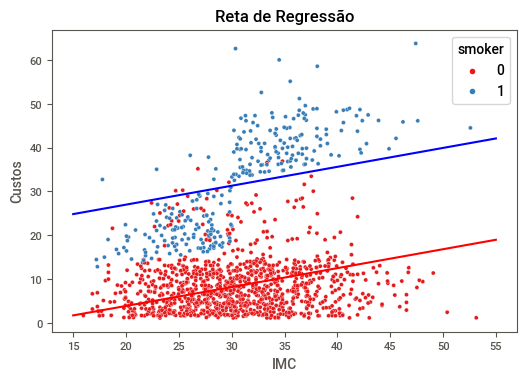

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y= 'charges',hue='smoker' , data = df,palette='Set1');
plt.plot(x, y0, color='red')
plt.plot(x, y1, color='blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Cenário 3 : considerando a variável **bmi**,**smoker** e **age**

In [ ]:
df2 = df[['bmi','smoker','age','charges']]
df2.head()

,bmi,smoker,age,charges
0,27.900,1,19,16.884924
1,33.770,0,18,1.725552
2,33.000,0,28,4.449462
3,22.705,0,33,21.984471
4,28.880,0,32,3.866855


In [ ]:
X = df[['bmi', 'smoker','age']]
y = df['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25)

reg = LinearRegression()
reg.fit(Xtreino,ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 3)))

EQM : 41.167


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2, b3 = reg.coef_
print('Intercept: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercept: 
 -11.629841803527674
Coeficientes: 
 [ 0.33732141 23.7833825   0.25059051]


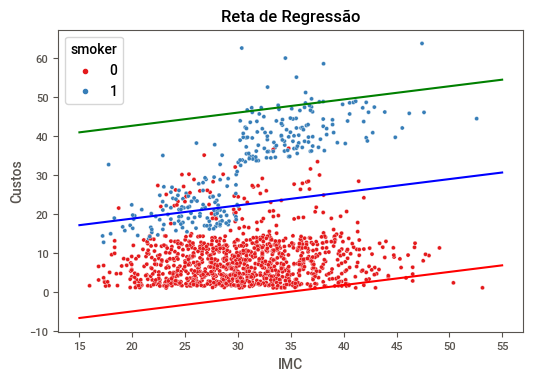

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1
y2 = b0 + b1*x + b2*2

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y= 'charges',hue='smoker' , data = df2,palette='Set1');
plt.plot(x, y0, color='red')
plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='green')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

### O resultado que obtivemos é bom o suficiente, mas podemos tentar melhorá-lo um pouco reduzindo recursos sem importância posteriormente!

### Ridge Regression

In [ ]:
X = df[['bmi', 'smoker','age']]
y = df['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25)

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(Xtreino, ytreino)
preditos = Ridge.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 3)))

EQM : 34.317


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2, b3 = reg.coef_
print('Intercept: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercept: 
 -11.076804791859661
Coeficientes: 
 [ 0.30784717 23.1214707   0.2562792 ]


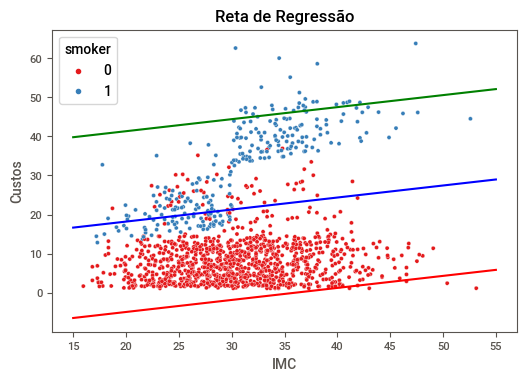

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1
y2 = b0 + b1*x + b2*2

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y= 'charges',hue='smoker' , data = df2,palette='Set1');
plt.plot(x, y0, color='red')
plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='green')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

### `Lasso Regression`









In [ ]:
X = df[['bmi', 'smoker','age']]
y = df['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25)

In [ ]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.1, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(Xtreino, ytreino)
preditos = Lasso.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 3)))

EQM : 38.286


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2, b3 = reg.coef_
print('Intercept: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercept: 
 -11.076804791859661
Coeficientes: 
 [ 0.30784717 23.1214707   0.2562792 ]


##**Holdout repetido**

Repetiçoes da técnica Holdout,variando a distribuição de quem vai para amostra de teste e treinamento.Guarde os resultados do EQM para cada repetição e ,no final,calcule sua média para obter um valor mais estável para o EQM

In [ ]:
def Holdoutrep(modelo = LinearRegression(), replicas = 100, proporcao = 0.20):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split 


    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
      Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = proporcao,)

      # Treinando o Modelo
      reg = modelo
      reg.fit(Xtreino, ytreino)

      # Verificando o eqm no teste
      preditos_treino = reg.predict(Xtreino)
      eqm_treino = mean_squared_error(ytreino, preditos_treino)

      preditos_teste = reg.predict(Xteste)
      eqm_teste = mean_squared_error(yteste, preditos_teste)


      # Guardando o resultado
      eqms_treino.append(eqm_treino)
      eqms_teste.append(eqm_teste)

    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print("EQM médio de TESTE: {}".format(res_teste))

    return res_treino, res_teste


In [ ]:
Holdoutrep(replicas= 100)

EQM médio de TREINO: 36.96
EQM médio de TESTE: 37.35


(36.96, 37.35)

#Mais Modelos de Regressão



##K-Vizinhos Mais Próximos (K-Nearest Neighbors)

In [ ]:
X = df['bmi'].values.reshape(-1,1)
y = df['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.20)

In [ ]:
 from sklearn.neighbors import KNeighborsRegressor

 knnreg = KNeighborsRegressor(n_neighbors = 9)
 knnreg.fit(Xtreino, ytreino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [ ]:
from sklearn.metrics import mean_squared_error

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print('O  Erro quadrático Médio de TREINO foi: {:.2f}'.format(eqm_treino))
print('O  Erro quadrático Médio de TESTE foi: {:.2f}'.format(eqm_teste))



O  Erro quadrático Médio de TREINO foi: 125.77
O  Erro quadrático Médio de TESTE foi: 154.86


O resultado pelo holdout é dado por :

In [ ]:
Holdoutrep(modelo= KNeighborsRegressor(n_neighbors= 9), replicas= 200)

EQM médio de TREINO: 127.15
EQM médio de TESTE: 158.0


(127.15, 158.0)

Plotando a solução

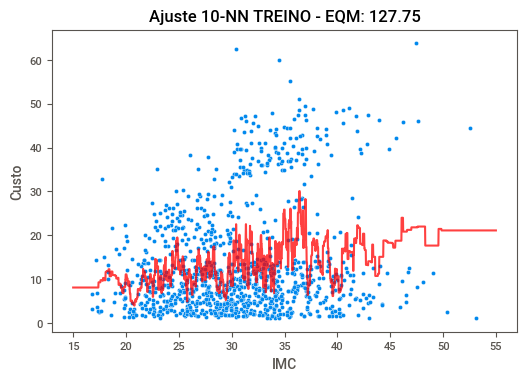

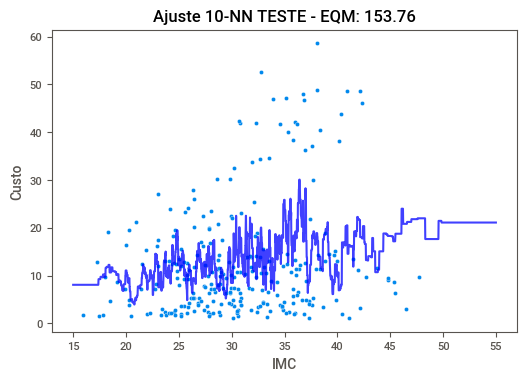

In [ ]:
k = 10
knnreg = KNeighborsRegressor(n_neighbors = k)
knnreg.fit(Xtreino, ytreino)

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np

x = np.arange(15, 55, 0.01)
y0 = knnreg.predict(x.reshape(-1, 1))

sns.scatterplot(x = Xtreino.reshape(-1), y = ytreino)
plt.plot(x, y0, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()